# Red Inicial


## Imports


In [1]:
from __future__ import annotations

from itertools import product
from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from custom_env.actions import Acciones
from custom_env.router_env import RouterEnv
from gymnasium import make
from gymnasium.utils.env_checker import check_env
from pandas import DataFrame, Series
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import Logger, configure
from stable_baselines3.common.monitor import Monitor

Cargado a las 2025-03-02 18:47:38.675152


In [2]:
name = "Example"
tmp_path = "./train_log/"
env_id = "RouterEnv-v0"

progress_bar = True
if progress_bar == True:
    import rich
    import tqdm

## Clases y Funciones


In [3]:

"""

class PacketAttack(Enum):
    @staticmethod
    def new_set(description, weight, class_ref):
        return {
            "Description": description,
            "weight": weight,
            "class": class_ref
        }

    @staticmethod
    def not_implemented():
        raise NotImplementedError(f"Class not implemented")
    @classmethod
    @cache
    def weights(cls):
        attack_weights = []
        for attack in PacketAttack:
            attack_weights.append(attack.value["weight"])
        return np.array(attack_weights)

    # ----ENUM VALUES----
    DOS = new_set("Denial of Service", 1.0, DOS_Packet_Generator)
    DDOS = new_set("Distributed Denial of Service", 2.0, DDOS_Packet_Generator)


gen = DOS_Packet_Generator(step_dur=1e-6,seed=1)




print(len(gen.generate_packets()))

"""

'\n\nclass PacketAttack(Enum):\n    @staticmethod\n    def new_set(description, weight, class_ref):\n        return {\n            "Description": description,\n            "weight": weight,\n            "class": class_ref\n        }\n\n    @staticmethod\n    def not_implemented():\n        raise NotImplementedError(f"Class not implemented")\n    @classmethod\n    @cache\n    def weights(cls):\n        attack_weights = []\n        for attack in PacketAttack:\n            attack_weights.append(attack.value["weight"])\n        return np.array(attack_weights)\n\n    # ----ENUM VALUES----\n    DOS = new_set("Denial of Service", 1.0, DOS_Packet_Generator)\n    DDOS = new_set("Distributed Denial of Service", 2.0, DDOS_Packet_Generator)\n\n\ngen = DOS_Packet_Generator(step_dur=1e-6,seed=1)\n\n\n\n\nprint(len(gen.generate_packets()))\n\n'

In [4]:
tiempo_global: float = 0.0
iteraciones = 0
# Decaorador auxiliar para poder medir el tiempo de las funciones


def medir_tiempo(activado=False):
    def fun(funcion):
        def wrapper(*args, **kwargs):
            if not activado:
                return funcion(*args, **kwargs)
            fun_tiempo = perf_counter
            inicio: float = fun_tiempo()
            resultado = funcion(*args, **kwargs)
            tiempo_total: float = fun_tiempo() - inicio
            global tiempo_global, iteraciones
            medida = 1e6
            t: float = tiempo_total*medida
            tiempo_global += t
            iteraciones += 1
            print(f"Tiempo de ejecución de {
                funcion.__name__}: {t:.2f} micro-segundos")
            return resultado
        return wrapper
    return fun

## Entrenamiento


In [5]:

seed = None
env: RouterEnv = make(env_id, seed=seed)
# env = RouterEnv(seed=None)
check_env(env)

new_logger: Logger = configure(tmp_path, ["stdout", "csv"])
env = Monitor(env, tmp_path)


model: PPO = PPO("MultiInputPolicy", env,
                 verbose=True)


"""
eval_callback = EvalCallback(
    env,  # Entorno de evaluación
    best_model_save_path="./logs/best_model",  # Ruta para guardar el mejor modelo
    log_path="./logs",  # Ruta para guardar estadísticas
    eval_freq=10000,  # Frecuencia de evaluación (en pasos)
    deterministic=True,
    render=False,
)
, callback=eval_callback
"""
"""
ep_info = a.ep_info_buffer
print(a.ep_info_buffer)
if ep_info is not None and len(ep_info) > 0:
    rew=ep_info[0]["r"]
    print(rew)
    saved= PPO.load("Example")
    print(ep_info.pop())
"""


model.set_logger(new_logger)
try:
    model.learn(total_timesteps=int(1e5//0.5),
                progress_bar=progress_bar)
except KeyboardInterrupt:
    print("Entrenamiento interrumpido")


g: str = input("¿Desea guardarlo? (s/n) ")
if g.lower() == "s":
    model.save(name)
    print("Modelo guardado")

Logging to ./train_log/
Using cpu device
Wrapping the env in a DummyVecEnv.


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | 124      |
| time/              |          |
|    fps             | 614      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 136         |
| time/                   |             |
|    fps                  | 523         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015368658 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.684      |
|    explained_variance   | 0.00545     |
|    learning_rate        | 0.0003      |
|    loss                 | 3.45        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 16.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 166         |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 3           |
|    time_elapsed         | 12          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.021747995 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.651      |
|    explained_variance   | -0.0627     |
|    learning_rate        | 0.0003      |
|    loss                 | 4.18        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 14.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 169         |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 4           |
|    time_elapsed         | 16          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.011780339 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.566      |
|    explained_variance   | -0.000673   |
|    learning_rate        | 0.0003      |
|    loss                 | 3.34        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 19.3        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 178          |
| time/                   |              |
|    fps                  | 506          |
|    iterations           | 5            |
|    time_elapsed         | 20           |
|    total_timesteps      | 10240        |
| train/                  |              |
|    approx_kl            | 0.0031186747 |
|    clip_fraction        | 0.0383       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.58        |
|    explained_variance   | 0.102        |
|    learning_rate        | 0.0003       |
|    loss                 | 8.01         |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.00616     |
|    value_loss           | 36.9         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 195         |
| time/                   |             |
|    fps                  | 508         |
|    iterations           | 6           |
|    time_elapsed         | 24          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.011335144 |
|    clip_fraction        | 0.0664      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.538      |
|    explained_variance   | 0.61        |
|    learning_rate        | 0.0003      |
|    loss                 | 10.4        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.00793    |
|    value_loss           | 30.2        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 204          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 7            |
|    time_elapsed         | 28           |
|    total_timesteps      | 14336        |
| train/                  |              |
|    approx_kl            | 0.0032541645 |
|    clip_fraction        | 0.0392       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.431       |
|    explained_variance   | 0.13         |
|    learning_rate        | 0.0003       |
|    loss                 | 11           |
|    n_updates            | 60           |
|    policy_gradient_loss | -0.00406     |
|    value_loss           | 33.3         |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | 208        |
| time/                   |            |
|    fps                  | 494        |
|    iterations           | 8          |
|    time_elapsed         | 33         |
|    total_timesteps      | 16384      |
| train/                  |            |
|    approx_kl            | 0.00269623 |
|    clip_fraction        | 0.00801    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.48      |
|    explained_variance   | 0.629      |
|    learning_rate        | 0.0003     |
|    loss                 | 16.5       |
|    n_updates            | 70         |
|    policy_gradient_loss | 4.45e-05   |
|    value_loss           | 44.9       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 203         |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 9           |
|    time_elapsed         | 37          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.004495005 |
|    clip_fraction        | 0.0627      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.513      |
|    explained_variance   | 0.76        |
|    learning_rate        | 0.0003      |
|    loss                 | 14.7        |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.00655    |
|    value_loss           | 38.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 212         |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 10          |
|    time_elapsed         | 41          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.005150833 |
|    clip_fraction        | 0.0281      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.537      |
|    explained_variance   | 0.792       |
|    learning_rate        | 0.0003      |
|    loss                 | 20.2        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.001      |
|    value_loss           | 34          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 218          |
| time/                   |              |
|    fps                  | 496          |
|    iterations           | 11           |
|    time_elapsed         | 45           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0038186803 |
|    clip_fraction        | 0.0282       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.428       |
|    explained_variance   | 0.326        |
|    learning_rate        | 0.0003       |
|    loss                 | 33.4         |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.00164     |
|    value_loss           | 55           |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 218         |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 12          |
|    time_elapsed         | 49          |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.005070687 |
|    clip_fraction        | 0.0384      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.453      |
|    explained_variance   | 0.558       |
|    learning_rate        | 0.0003      |
|    loss                 | 21.5        |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.00407    |
|    value_loss           | 59.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 223         |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 13          |
|    time_elapsed         | 53          |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.003477342 |
|    clip_fraction        | 0.0141      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.469      |
|    explained_variance   | 0.614       |
|    learning_rate        | 0.0003      |
|    loss                 | 27.4        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00132    |
|    value_loss           | 56.2        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 230          |
| time/                   |              |
|    fps                  | 498          |
|    iterations           | 14           |
|    time_elapsed         | 57           |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0056189117 |
|    clip_fraction        | 0.0354       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.367       |
|    explained_variance   | 0.769        |
|    learning_rate        | 0.0003       |
|    loss                 | 32.3         |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 54.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 236          |
| time/                   |              |
|    fps                  | 499          |
|    iterations           | 15           |
|    time_elapsed         | 61           |
|    total_timesteps      | 30720        |
| train/                  |              |
|    approx_kl            | 0.0016020173 |
|    clip_fraction        | 0.0423       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.369       |
|    explained_variance   | 0.325        |
|    learning_rate        | 0.0003       |
|    loss                 | 26.3         |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.00488     |
|    value_loss           | 60.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 240          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 16           |
|    time_elapsed         | 65           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0033565098 |
|    clip_fraction        | 0.0364       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.325       |
|    explained_variance   | 0.0487       |
|    learning_rate        | 0.0003       |
|    loss                 | 44           |
|    n_updates            | 150          |
|    policy_gradient_loss | 0.000552     |
|    value_loss           | 71.1         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 241          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 17           |
|    time_elapsed         | 69           |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 0.0031047666 |
|    clip_fraction        | 0.0392       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.368       |
|    explained_variance   | 0.26         |
|    learning_rate        | 0.0003       |
|    loss                 | 28.8         |
|    n_updates            | 160          |
|    policy_gradient_loss | -0.0015      |
|    value_loss           | 70.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 245          |
| time/                   |              |
|    fps                  | 499          |
|    iterations           | 18           |
|    time_elapsed         | 73           |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0051213824 |
|    clip_fraction        | 0.0283       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.426       |
|    explained_variance   | 0.539        |
|    learning_rate        | 0.0003       |
|    loss                 | 41.8         |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.00222     |
|    value_loss           | 79.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 247          |
| time/                   |              |
|    fps                  | 498          |
|    iterations           | 19           |
|    time_elapsed         | 78           |
|    total_timesteps      | 38912        |
| train/                  |              |
|    approx_kl            | 0.0031975163 |
|    clip_fraction        | 0.0486       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.367       |
|    explained_variance   | 0.176        |
|    learning_rate        | 0.0003       |
|    loss                 | 94           |
|    n_updates            | 180          |
|    policy_gradient_loss | 0.000545     |
|    value_loss           | 72.3         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 253         |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 20          |
|    time_elapsed         | 82          |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.001820409 |
|    clip_fraction        | 0.0121      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.359      |
|    explained_variance   | 0.387       |
|    learning_rate        | 0.0003      |
|    loss                 | 20.2        |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.000344   |
|    value_loss           | 75.9        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 261          |
| time/                   |              |
|    fps                  | 496          |
|    iterations           | 21           |
|    time_elapsed         | 86           |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0034937283 |
|    clip_fraction        | 0.0558       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.405       |
|    explained_variance   | 0.243        |
|    learning_rate        | 0.0003       |
|    loss                 | 19.2         |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 75.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 268          |
| time/                   |              |
|    fps                  | 495          |
|    iterations           | 22           |
|    time_elapsed         | 90           |
|    total_timesteps      | 45056        |
| train/                  |              |
|    approx_kl            | 0.0015373239 |
|    clip_fraction        | 0.0208       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.368       |
|    explained_variance   | 0.338        |
|    learning_rate        | 0.0003       |
|    loss                 | 31           |
|    n_updates            | 210          |
|    policy_gradient_loss | 0.000784     |
|    value_loss           | 75.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 272          |
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 23           |
|    time_elapsed         | 95           |
|    total_timesteps      | 47104        |
| train/                  |              |
|    approx_kl            | 0.0029907117 |
|    clip_fraction        | 0.0303       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.281       |
|    explained_variance   | 0.189        |
|    learning_rate        | 0.0003       |
|    loss                 | 16.8         |
|    n_updates            | 220          |
|    policy_gradient_loss | 8.11e-07     |
|    value_loss           | 83           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 282          |
| time/                   |              |
|    fps                  | 496          |
|    iterations           | 24           |
|    time_elapsed         | 99           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0024427036 |
|    clip_fraction        | 0.0288       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.316       |
|    explained_variance   | 0.118        |
|    learning_rate        | 0.0003       |
|    loss                 | 101          |
|    n_updates            | 230          |
|    policy_gradient_loss | 7.31e-05     |
|    value_loss           | 78.9         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 281          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 25           |
|    time_elapsed         | 102          |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0014453757 |
|    clip_fraction        | 0.0288       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.255       |
|    explained_variance   | 0.0961       |
|    learning_rate        | 0.0003       |
|    loss                 | 13.1         |
|    n_updates            | 240          |
|    policy_gradient_loss | 0.000227     |
|    value_loss           | 87.5         |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | 283        |
| time/                   |            |
|    fps                  | 497        |
|    iterations           | 26         |
|    time_elapsed         | 107        |
|    total_timesteps      | 53248      |
| train/                  |            |
|    approx_kl            | 0.00337289 |
|    clip_fraction        | 0.0386     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.308     |
|    explained_variance   | 0.464      |
|    learning_rate        | 0.0003     |
|    loss                 | 10.6       |
|    n_updates            | 250        |
|    policy_gradient_loss | -0.000259  |
|    value_loss           | 88.8       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 285         |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 27          |
|    time_elapsed         | 111         |
|    total_timesteps      | 55296       |
| train/                  |             |
|    approx_kl            | 0.004167223 |
|    clip_fraction        | 0.0276      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.264      |
|    explained_variance   | 0.626       |
|    learning_rate        | 0.0003      |
|    loss                 | 28.7        |
|    n_updates            | 260         |
|    policy_gradient_loss | -5.09e-05   |
|    value_loss           | 79.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 291         |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 28          |
|    time_elapsed         | 115         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.002648367 |
|    clip_fraction        | 0.0197      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.285      |
|    explained_variance   | 0.333       |
|    learning_rate        | 0.0003      |
|    loss                 | 25.6        |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.00105    |
|    value_loss           | 93.5        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 294          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 29           |
|    time_elapsed         | 119          |
|    total_timesteps      | 59392        |
| train/                  |              |
|    approx_kl            | 0.0028218632 |
|    clip_fraction        | 0.0217       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.221       |
|    explained_variance   | 0.271        |
|    learning_rate        | 0.0003       |
|    loss                 | 25.4         |
|    n_updates            | 280          |
|    policy_gradient_loss | -4.96e-05    |
|    value_loss           | 84.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 295          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 30           |
|    time_elapsed         | 123          |
|    total_timesteps      | 61440        |
| train/                  |              |
|    approx_kl            | 0.0034952087 |
|    clip_fraction        | 0.0101       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.201       |
|    explained_variance   | 0.443        |
|    learning_rate        | 0.0003       |
|    loss                 | 53.1         |
|    n_updates            | 290          |
|    policy_gradient_loss | 0.000264     |
|    value_loss           | 95.7         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 299           |
| time/                   |               |
|    fps                  | 497           |
|    iterations           | 31            |
|    time_elapsed         | 127           |
|    total_timesteps      | 63488         |
| train/                  |               |
|    approx_kl            | 0.00082145573 |
|    clip_fraction        | 0.0176        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.217        |
|    explained_variance   | 0.341         |
|    learning_rate        | 0.0003        |
|    loss                 | 32.5          |
|    n_updates            | 300           |
|    policy_gradient_loss | -0.000865     |
|    value_loss           | 93.8          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 304          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 32           |
|    time_elapsed         | 131          |
|    total_timesteps      | 65536        |
| train/                  |              |
|    approx_kl            | 0.0035561186 |
|    clip_fraction        | 0.014        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.239       |
|    explained_variance   | 0.188        |
|    learning_rate        | 0.0003       |
|    loss                 | 14.8         |
|    n_updates            | 310          |
|    policy_gradient_loss | 0.000711     |
|    value_loss           | 95.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 302          |
| time/                   |              |
|    fps                  | 499          |
|    iterations           | 33           |
|    time_elapsed         | 135          |
|    total_timesteps      | 67584        |
| train/                  |              |
|    approx_kl            | 0.0011769407 |
|    clip_fraction        | 0.0273       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.155       |
|    explained_variance   | 0.17         |
|    learning_rate        | 0.0003       |
|    loss                 | 88.8         |
|    n_updates            | 320          |
|    policy_gradient_loss | -0.000988    |
|    value_loss           | 92.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 302          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 34           |
|    time_elapsed         | 140          |
|    total_timesteps      | 69632        |
| train/                  |              |
|    approx_kl            | 0.0044918023 |
|    clip_fraction        | 0.0115       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.158       |
|    explained_variance   | 0.313        |
|    learning_rate        | 0.0003       |
|    loss                 | 10.5         |
|    n_updates            | 330          |
|    policy_gradient_loss | 8.16e-05     |
|    value_loss           | 89.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 300          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 35           |
|    time_elapsed         | 143          |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0016376132 |
|    clip_fraction        | 0.0312       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.156       |
|    explained_variance   | 0.149        |
|    learning_rate        | 0.0003       |
|    loss                 | 83.1         |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00627     |
|    value_loss           | 108          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 306           |
| time/                   |               |
|    fps                  | 497           |
|    iterations           | 36            |
|    time_elapsed         | 148           |
|    total_timesteps      | 73728         |
| train/                  |               |
|    approx_kl            | 0.00029877672 |
|    clip_fraction        | 0.0101        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.159        |
|    explained_variance   | 0.264         |
|    learning_rate        | 0.0003        |
|    loss                 | 8.69          |
|    n_updates            | 350           |
|    policy_gradient_loss | 0.000848      |
|    value_loss           | 93.5          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 305          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 37           |
|    time_elapsed         | 152          |
|    total_timesteps      | 75776        |
| train/                  |              |
|    approx_kl            | 0.0014271202 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.154       |
|    explained_variance   | 0.0883       |
|    learning_rate        | 0.0003       |
|    loss                 | 71.2         |
|    n_updates            | 360          |
|    policy_gradient_loss | 0.000922     |
|    value_loss           | 89.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 309          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 38           |
|    time_elapsed         | 156          |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0013797056 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.168       |
|    explained_variance   | 0.271        |
|    learning_rate        | 0.0003       |
|    loss                 | 48.7         |
|    n_updates            | 370          |
|    policy_gradient_loss | -0.000524    |
|    value_loss           | 89.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 309          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 39           |
|    time_elapsed         | 160          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0014299438 |
|    clip_fraction        | 0.0208       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.13        |
|    explained_variance   | 0.0876       |
|    learning_rate        | 0.0003       |
|    loss                 | 20.6         |
|    n_updates            | 380          |
|    policy_gradient_loss | -0.00144     |
|    value_loss           | 96.7         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 311         |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 40          |
|    time_elapsed         | 164         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.018236166 |
|    clip_fraction        | 0.0358      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.176      |
|    explained_variance   | 0.153       |
|    learning_rate        | 0.0003      |
|    loss                 | 28.6        |
|    n_updates            | 390         |
|    policy_gradient_loss | 0.00118     |
|    value_loss           | 89.6        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 312          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 41           |
|    time_elapsed         | 168          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0025295431 |
|    clip_fraction        | 0.0377       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.137       |
|    explained_variance   | 0.0256       |
|    learning_rate        | 0.0003       |
|    loss                 | 37.7         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.000947    |
|    value_loss           | 93           |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 313           |
| time/                   |               |
|    fps                  | 496           |
|    iterations           | 42            |
|    time_elapsed         | 173           |
|    total_timesteps      | 86016         |
| train/                  |               |
|    approx_kl            | 0.00077660044 |
|    clip_fraction        | 0.0157        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.151        |
|    explained_variance   | 0.147         |
|    learning_rate        | 0.0003        |
|    loss                 | 45            |
|    n_updates            | 410           |
|    policy_gradient_loss | 0.000716      |
|    value_loss           | 91.3          |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 309         |
| time/                   |             |
|    fps                  | 496         |
|    iterations           | 43          |
|    time_elapsed         | 177         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.001976642 |
|    clip_fraction        | 0.0214      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.145      |
|    explained_variance   | 0.137       |
|    learning_rate        | 0.0003      |
|    loss                 | 89.3        |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.000236   |
|    value_loss           | 112         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 304          |
| time/                   |              |
|    fps                  | 495          |
|    iterations           | 44           |
|    time_elapsed         | 181          |
|    total_timesteps      | 90112        |
| train/                  |              |
|    approx_kl            | 0.0005846828 |
|    clip_fraction        | 0.00757      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.216       |
|    explained_variance   | 0.535        |
|    learning_rate        | 0.0003       |
|    loss                 | 24.7         |
|    n_updates            | 430          |
|    policy_gradient_loss | 0.00052      |
|    value_loss           | 90.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 305          |
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 45           |
|    time_elapsed         | 186          |
|    total_timesteps      | 92160        |
| train/                  |              |
|    approx_kl            | 0.0012944059 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.205       |
|    explained_variance   | 0.686        |
|    learning_rate        | 0.0003       |
|    loss                 | 37.1         |
|    n_updates            | 440          |
|    policy_gradient_loss | -0.00056     |
|    value_loss           | 80.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 307          |
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 46           |
|    time_elapsed         | 190          |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0014941541 |
|    clip_fraction        | 0.0217       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.173       |
|    explained_variance   | 0.37         |
|    learning_rate        | 0.0003       |
|    loss                 | 21.7         |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.001       |
|    value_loss           | 109          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 309          |
| time/                   |              |
|    fps                  | 493          |
|    iterations           | 47           |
|    time_elapsed         | 195          |
|    total_timesteps      | 96256        |
| train/                  |              |
|    approx_kl            | 0.0052154595 |
|    clip_fraction        | 0.0541       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.144       |
|    explained_variance   | 0.328        |
|    learning_rate        | 0.0003       |
|    loss                 | 42.4         |
|    n_updates            | 460          |
|    policy_gradient_loss | -0.00346     |
|    value_loss           | 97.6         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 311         |
| time/                   |             |
|    fps                  | 493         |
|    iterations           | 48          |
|    time_elapsed         | 199         |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.002317025 |
|    clip_fraction        | 0.0303      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.172      |
|    explained_variance   | 0.233       |
|    learning_rate        | 0.0003      |
|    loss                 | 30.1        |
|    n_updates            | 470         |
|    policy_gradient_loss | -0.000938   |
|    value_loss           | 90.1        |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 306           |
| time/                   |               |
|    fps                  | 493           |
|    iterations           | 49            |
|    time_elapsed         | 203           |
|    total_timesteps      | 100352        |
| train/                  |               |
|    approx_kl            | 0.00061473256 |
|    clip_fraction        | 0.024         |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.15         |
|    explained_variance   | 0.178         |
|    learning_rate        | 0.0003        |
|    loss                 | 39.4          |
|    n_updates            | 480           |
|    policy_gradient_loss | -0.000518     |
|    value_loss           | 91.1          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 304          |
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 50           |
|    time_elapsed         | 207          |
|    total_timesteps      | 102400       |
| train/                  |              |
|    approx_kl            | 0.0033456595 |
|    clip_fraction        | 0.0277       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.226       |
|    explained_variance   | 0.174        |
|    learning_rate        | 0.0003       |
|    loss                 | 26.4         |
|    n_updates            | 490          |
|    policy_gradient_loss | 0.000284     |
|    value_loss           | 85.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 307         |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 51          |
|    time_elapsed         | 211         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.002366574 |
|    clip_fraction        | 0.0157      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.173      |
|    explained_variance   | 0.298       |
|    learning_rate        | 0.0003      |
|    loss                 | 84.6        |
|    n_updates            | 500         |
|    policy_gradient_loss | 0.000203    |
|    value_loss           | 102         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 309         |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 52          |
|    time_elapsed         | 215         |
|    total_timesteps      | 106496      |
| train/                  |             |
|    approx_kl            | 0.045391664 |
|    clip_fraction        | 0.0302      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.114      |
|    explained_variance   | 0.135       |
|    learning_rate        | 0.0003      |
|    loss                 | 65.6        |
|    n_updates            | 510         |
|    policy_gradient_loss | 0.00273     |
|    value_loss           | 87.5        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 307          |
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 53           |
|    time_elapsed         | 219          |
|    total_timesteps      | 108544       |
| train/                  |              |
|    approx_kl            | 0.0013799375 |
|    clip_fraction        | 0.0085       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0542      |
|    explained_variance   | 0.12         |
|    learning_rate        | 0.0003       |
|    loss                 | 30.4         |
|    n_updates            | 520          |
|    policy_gradient_loss | 8.4e-05      |
|    value_loss           | 93.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 305          |
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 54           |
|    time_elapsed         | 223          |
|    total_timesteps      | 110592       |
| train/                  |              |
|    approx_kl            | 0.0065111294 |
|    clip_fraction        | 0.0334       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0968      |
|    explained_variance   | 0.277        |
|    learning_rate        | 0.0003       |
|    loss                 | 26.3         |
|    n_updates            | 530          |
|    policy_gradient_loss | 0.00219      |
|    value_loss           | 90           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 302          |
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 55           |
|    time_elapsed         | 227          |
|    total_timesteps      | 112640       |
| train/                  |              |
|    approx_kl            | 0.0007798312 |
|    clip_fraction        | 0.0192       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.092       |
|    explained_variance   | 0.478        |
|    learning_rate        | 0.0003       |
|    loss                 | 35.6         |
|    n_updates            | 540          |
|    policy_gradient_loss | -0.000783    |
|    value_loss           | 82.1         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 301          |
| time/                   |              |
|    fps                  | 494          |
|    iterations           | 56           |
|    time_elapsed         | 231          |
|    total_timesteps      | 114688       |
| train/                  |              |
|    approx_kl            | 0.0008821161 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.104       |
|    explained_variance   | 0.562        |
|    learning_rate        | 0.0003       |
|    loss                 | 30.9         |
|    n_updates            | 550          |
|    policy_gradient_loss | -0.000984    |
|    value_loss           | 91.3         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 302         |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 57          |
|    time_elapsed         | 235         |
|    total_timesteps      | 116736      |
| train/                  |             |
|    approx_kl            | 0.012026474 |
|    clip_fraction        | 0.046       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0909     |
|    explained_variance   | 0.0895      |
|    learning_rate        | 0.0003      |
|    loss                 | 70.3        |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.00446    |
|    value_loss           | 87          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 298         |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 58          |
|    time_elapsed         | 240         |
|    total_timesteps      | 118784      |
| train/                  |             |
|    approx_kl            | 0.017244905 |
|    clip_fraction        | 0.0142      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0827     |
|    explained_variance   | 0.191       |
|    learning_rate        | 0.0003      |
|    loss                 | 25.4        |
|    n_updates            | 570         |
|    policy_gradient_loss | 0.0026      |
|    value_loss           | 87.7        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | 297        |
| time/                   |            |
|    fps                  | 495        |
|    iterations           | 59         |
|    time_elapsed         | 243        |
|    total_timesteps      | 120832     |
| train/                  |            |
|    approx_kl            | 0.00280183 |
|    clip_fraction        | 0.0108     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0585    |
|    explained_variance   | 0.236      |
|    learning_rate        | 0.0003     |
|    loss                 | 21.8       |
|    n_updates            | 580        |
|    policy_gradient_loss | 0.00194    |
|    value_loss           | 87.2       |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 296          |
| time/                   |              |
|    fps                  | 495          |
|    iterations           | 60           |
|    time_elapsed         | 247          |
|    total_timesteps      | 122880       |
| train/                  |              |
|    approx_kl            | 0.0002880835 |
|    clip_fraction        | 0.00464      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0393      |
|    explained_variance   | 0.297        |
|    learning_rate        | 0.0003       |
|    loss                 | 58.8         |
|    n_updates            | 590          |
|    policy_gradient_loss | -0.000258    |
|    value_loss           | 112          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 293          |
| time/                   |              |
|    fps                  | 495          |
|    iterations           | 61           |
|    time_elapsed         | 252          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0006213617 |
|    clip_fraction        | 0.00947      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0407      |
|    explained_variance   | 0.106        |
|    learning_rate        | 0.0003       |
|    loss                 | 65.3         |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.000744    |
|    value_loss           | 102          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 294           |
| time/                   |               |
|    fps                  | 495           |
|    iterations           | 62            |
|    time_elapsed         | 256           |
|    total_timesteps      | 126976        |
| train/                  |               |
|    approx_kl            | 0.00040572986 |
|    clip_fraction        | 0.00654       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0438       |
|    explained_variance   | 0.171         |
|    learning_rate        | 0.0003        |
|    loss                 | 50.8          |
|    n_updates            | 610           |
|    policy_gradient_loss | -0.000214     |
|    value_loss           | 90.4          |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 291         |
| time/                   |             |
|    fps                  | 495         |
|    iterations           | 63          |
|    time_elapsed         | 260         |
|    total_timesteps      | 129024      |
| train/                  |             |
|    approx_kl            | 0.016080558 |
|    clip_fraction        | 0.0302      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0677     |
|    explained_variance   | 0.193       |
|    learning_rate        | 0.0003      |
|    loss                 | 28.2        |
|    n_updates            | 620         |
|    policy_gradient_loss | -0.00366    |
|    value_loss           | 91.4        |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 295           |
| time/                   |               |
|    fps                  | 496           |
|    iterations           | 64            |
|    time_elapsed         | 264           |
|    total_timesteps      | 131072        |
| train/                  |               |
|    approx_kl            | 0.00073578977 |
|    clip_fraction        | 0.00522       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0976       |
|    explained_variance   | 0.378         |
|    learning_rate        | 0.0003        |
|    loss                 | 27.5          |
|    n_updates            | 630           |
|    policy_gradient_loss | -6.78e-05     |
|    value_loss           | 84.6          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 297          |
| time/                   |              |
|    fps                  | 496          |
|    iterations           | 65           |
|    time_elapsed         | 268          |
|    total_timesteps      | 133120       |
| train/                  |              |
|    approx_kl            | 0.0013720709 |
|    clip_fraction        | 0.0112       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.091       |
|    explained_variance   | 0.52         |
|    learning_rate        | 0.0003       |
|    loss                 | 24           |
|    n_updates            | 640          |
|    policy_gradient_loss | -0.000859    |
|    value_loss           | 88.4         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 297          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 66           |
|    time_elapsed         | 271          |
|    total_timesteps      | 135168       |
| train/                  |              |
|    approx_kl            | 0.0048454357 |
|    clip_fraction        | 0.0218       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0774      |
|    explained_variance   | 0.243        |
|    learning_rate        | 0.0003       |
|    loss                 | 24           |
|    n_updates            | 650          |
|    policy_gradient_loss | -0.00612     |
|    value_loss           | 94.2         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 299           |
| time/                   |               |
|    fps                  | 497           |
|    iterations           | 67            |
|    time_elapsed         | 275           |
|    total_timesteps      | 137216        |
| train/                  |               |
|    approx_kl            | 0.00048903766 |
|    clip_fraction        | 0.00693       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.056        |
|    explained_variance   | 0.14          |
|    learning_rate        | 0.0003        |
|    loss                 | 18.4          |
|    n_updates            | 660           |
|    policy_gradient_loss | 0.000379      |
|    value_loss           | 90.8          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 300          |
| time/                   |              |
|    fps                  | 497          |
|    iterations           | 68           |
|    time_elapsed         | 279          |
|    total_timesteps      | 139264       |
| train/                  |              |
|    approx_kl            | 0.0031835474 |
|    clip_fraction        | 0.0232       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0833      |
|    explained_variance   | 0.271        |
|    learning_rate        | 0.0003       |
|    loss                 | 57.7         |
|    n_updates            | 670          |
|    policy_gradient_loss | 0.00013      |
|    value_loss           | 100          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 301           |
| time/                   |               |
|    fps                  | 498           |
|    iterations           | 69            |
|    time_elapsed         | 283           |
|    total_timesteps      | 141312        |
| train/                  |               |
|    approx_kl            | 0.00024776143 |
|    clip_fraction        | 0.00947       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0827       |
|    explained_variance   | 0.129         |
|    learning_rate        | 0.0003        |
|    loss                 | 17.8          |
|    n_updates            | 680           |
|    policy_gradient_loss | 0.000855      |
|    value_loss           | 93.5          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 303          |
| time/                   |              |
|    fps                  | 498          |
|    iterations           | 70           |
|    time_elapsed         | 287          |
|    total_timesteps      | 143360       |
| train/                  |              |
|    approx_kl            | 0.0011716124 |
|    clip_fraction        | 0.015        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0831      |
|    explained_variance   | 0.197        |
|    learning_rate        | 0.0003       |
|    loss                 | 44.8         |
|    n_updates            | 690          |
|    policy_gradient_loss | 0.00139      |
|    value_loss           | 89           |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 301           |
| time/                   |               |
|    fps                  | 498           |
|    iterations           | 71            |
|    time_elapsed         | 291           |
|    total_timesteps      | 145408        |
| train/                  |               |
|    approx_kl            | 0.00044828685 |
|    clip_fraction        | 0.00635       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0827       |
|    explained_variance   | 0.191         |
|    learning_rate        | 0.0003        |
|    loss                 | 16.1          |
|    n_updates            | 700           |
|    policy_gradient_loss | 0.000318      |
|    value_loss           | 94.1          |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 298         |
| time/                   |             |
|    fps                  | 499         |
|    iterations           | 72          |
|    time_elapsed         | 295         |
|    total_timesteps      | 147456      |
| train/                  |             |
|    approx_kl            | 0.015725547 |
|    clip_fraction        | 0.0153      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0887     |
|    explained_variance   | 0.327       |
|    learning_rate        | 0.0003      |
|    loss                 | 13.2        |
|    n_updates            | 710         |
|    policy_gradient_loss | 0.00111     |
|    value_loss           | 87.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 301         |
| time/                   |             |
|    fps                  | 499         |
|    iterations           | 73          |
|    time_elapsed         | 299         |
|    total_timesteps      | 149504      |
| train/                  |             |
|    approx_kl            | 0.009546813 |
|    clip_fraction        | 0.0333      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0831     |
|    explained_variance   | 0.217       |
|    learning_rate        | 0.0003      |
|    loss                 | 10.7        |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.00311    |
|    value_loss           | 96.2        |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 306           |
| time/                   |               |
|    fps                  | 499           |
|    iterations           | 74            |
|    time_elapsed         | 303           |
|    total_timesteps      | 151552        |
| train/                  |               |
|    approx_kl            | 0.00040280225 |
|    clip_fraction        | 0.00518       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0556       |
|    explained_variance   | 0.166         |
|    learning_rate        | 0.0003        |
|    loss                 | 116           |
|    n_updates            | 730           |
|    policy_gradient_loss | 0.00059       |
|    value_loss           | 94.1          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 305          |
| time/                   |              |
|    fps                  | 499          |
|    iterations           | 75           |
|    time_elapsed         | 307          |
|    total_timesteps      | 153600       |
| train/                  |              |
|    approx_kl            | 0.0012252375 |
|    clip_fraction        | 0.0112       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0712      |
|    explained_variance   | 0.253        |
|    learning_rate        | 0.0003       |
|    loss                 | 16           |
|    n_updates            | 740          |
|    policy_gradient_loss | 0.000727     |
|    value_loss           | 99.5         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 302           |
| time/                   |               |
|    fps                  | 499           |
|    iterations           | 76            |
|    time_elapsed         | 311           |
|    total_timesteps      | 155648        |
| train/                  |               |
|    approx_kl            | 0.00071217935 |
|    clip_fraction        | 0.0154        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0735       |
|    explained_variance   | 0.257         |
|    learning_rate        | 0.0003        |
|    loss                 | 51.7          |
|    n_updates            | 750           |
|    policy_gradient_loss | 7.34e-05      |
|    value_loss           | 99.7          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 304           |
| time/                   |               |
|    fps                  | 499           |
|    iterations           | 77            |
|    time_elapsed         | 315           |
|    total_timesteps      | 157696        |
| train/                  |               |
|    approx_kl            | 0.00050915085 |
|    clip_fraction        | 0.00625       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0754       |
|    explained_variance   | 0.437         |
|    learning_rate        | 0.0003        |
|    loss                 | 48.4          |
|    n_updates            | 760           |
|    policy_gradient_loss | 8.1e-05       |
|    value_loss           | 86.6          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 305          |
| time/                   |              |
|    fps                  | 499          |
|    iterations           | 78           |
|    time_elapsed         | 319          |
|    total_timesteps      | 159744       |
| train/                  |              |
|    approx_kl            | 0.0066046556 |
|    clip_fraction        | 0.00967      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0616      |
|    explained_variance   | 0.177        |
|    learning_rate        | 0.0003       |
|    loss                 | 18.9         |
|    n_updates            | 770          |
|    policy_gradient_loss | 0.000588     |
|    value_loss           | 94.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 305          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 79           |
|    time_elapsed         | 323          |
|    total_timesteps      | 161792       |
| train/                  |              |
|    approx_kl            | 0.0006824135 |
|    clip_fraction        | 0.0131       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.063       |
|    explained_variance   | 0.207        |
|    learning_rate        | 0.0003       |
|    loss                 | 25           |
|    n_updates            | 780          |
|    policy_gradient_loss | 0.00064      |
|    value_loss           | 84.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 306          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 81           |
|    time_elapsed         | 331          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0015099198 |
|    clip_fraction        | 0.0181       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0711      |
|    explained_variance   | 0.189        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.4         |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.000396    |
|    value_loss           | 92.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 309          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 82           |
|    time_elapsed         | 335          |
|    total_timesteps      | 167936       |
| train/                  |              |
|    approx_kl            | 0.0014393297 |
|    clip_fraction        | 0.0085       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0768      |
|    explained_variance   | 0.426        |
|    learning_rate        | 0.0003       |
|    loss                 | 66.5         |
|    n_updates            | 810          |
|    policy_gradient_loss | 0.0013       |
|    value_loss           | 93.3         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 312           |
| time/                   |               |
|    fps                  | 501           |
|    iterations           | 83            |
|    time_elapsed         | 339           |
|    total_timesteps      | 169984        |
| train/                  |               |
|    approx_kl            | 0.00048253062 |
|    clip_fraction        | 0.00239       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0596       |
|    explained_variance   | 0.164         |
|    learning_rate        | 0.0003        |
|    loss                 | 35.9          |
|    n_updates            | 820           |
|    policy_gradient_loss | 0.000112      |
|    value_loss           | 96.4          |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 310         |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 84          |
|    time_elapsed         | 343         |
|    total_timesteps      | 172032      |
| train/                  |             |
|    approx_kl            | 0.001985926 |
|    clip_fraction        | 0.0256      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.089      |
|    explained_variance   | 0.255       |
|    learning_rate        | 0.0003      |
|    loss                 | 61.5        |
|    n_updates            | 830         |
|    policy_gradient_loss | 0.0014      |
|    value_loss           | 92.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 308         |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 85          |
|    time_elapsed         | 347         |
|    total_timesteps      | 174080      |
| train/                  |             |
|    approx_kl            | 0.002475437 |
|    clip_fraction        | 0.032       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.117      |
|    explained_variance   | 0.262       |
|    learning_rate        | 0.0003      |
|    loss                 | 38.7        |
|    n_updates            | 840         |
|    policy_gradient_loss | -0.000924   |
|    value_loss           | 98          |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 308           |
| time/                   |               |
|    fps                  | 501           |
|    iterations           | 86            |
|    time_elapsed         | 351           |
|    total_timesteps      | 176128        |
| train/                  |               |
|    approx_kl            | 0.00085021125 |
|    clip_fraction        | 0.0118        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0932       |
|    explained_variance   | 0.392         |
|    learning_rate        | 0.0003        |
|    loss                 | 30.3          |
|    n_updates            | 850           |
|    policy_gradient_loss | -0.000854     |
|    value_loss           | 91.6          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 307          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 87           |
|    time_elapsed         | 355          |
|    total_timesteps      | 178176       |
| train/                  |              |
|    approx_kl            | 0.0024389713 |
|    clip_fraction        | 0.0231       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0874      |
|    explained_variance   | 0.153        |
|    learning_rate        | 0.0003       |
|    loss                 | 13.4         |
|    n_updates            | 860          |
|    policy_gradient_loss | 0.000584     |
|    value_loss           | 90.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 305          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 88           |
|    time_elapsed         | 359          |
|    total_timesteps      | 180224       |
| train/                  |              |
|    approx_kl            | 0.0026025549 |
|    clip_fraction        | 0.0217       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0798      |
|    explained_variance   | 0.167        |
|    learning_rate        | 0.0003       |
|    loss                 | 77.5         |
|    n_updates            | 870          |
|    policy_gradient_loss | 0.000827     |
|    value_loss           | 84.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 302          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 89           |
|    time_elapsed         | 363          |
|    total_timesteps      | 182272       |
| train/                  |              |
|    approx_kl            | 0.0026896263 |
|    clip_fraction        | 0.0185       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.103       |
|    explained_variance   | 0.176        |
|    learning_rate        | 0.0003       |
|    loss                 | 23.8         |
|    n_updates            | 880          |
|    policy_gradient_loss | -0.000127    |
|    value_loss           | 77           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 305          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 90           |
|    time_elapsed         | 367          |
|    total_timesteps      | 184320       |
| train/                  |              |
|    approx_kl            | 0.0030678485 |
|    clip_fraction        | 0.0282       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0916      |
|    explained_variance   | 0.249        |
|    learning_rate        | 0.0003       |
|    loss                 | 62.9         |
|    n_updates            | 890          |
|    policy_gradient_loss | -0.000678    |
|    value_loss           | 83.2         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 305         |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 91          |
|    time_elapsed         | 371         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.001402434 |
|    clip_fraction        | 0.00752     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0652     |
|    explained_variance   | 0.103       |
|    learning_rate        | 0.0003      |
|    loss                 | 74.3        |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.000104   |
|    value_loss           | 91.3        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 306          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 92           |
|    time_elapsed         | 375          |
|    total_timesteps      | 188416       |
| train/                  |              |
|    approx_kl            | 0.0005859587 |
|    clip_fraction        | 0.0122       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0808      |
|    explained_variance   | 0.261        |
|    learning_rate        | 0.0003       |
|    loss                 | 40.7         |
|    n_updates            | 910          |
|    policy_gradient_loss | -0.00042     |
|    value_loss           | 85.9         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 307          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 93           |
|    time_elapsed         | 379          |
|    total_timesteps      | 190464       |
| train/                  |              |
|    approx_kl            | 0.0010845682 |
|    clip_fraction        | 0.0156       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0656      |
|    explained_variance   | 0.108        |
|    learning_rate        | 0.0003       |
|    loss                 | 61.3         |
|    n_updates            | 920          |
|    policy_gradient_loss | 0.000332     |
|    value_loss           | 100          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 307          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 94           |
|    time_elapsed         | 383          |
|    total_timesteps      | 192512       |
| train/                  |              |
|    approx_kl            | 0.0006838006 |
|    clip_fraction        | 0.00557      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0706      |
|    explained_variance   | 0.11         |
|    learning_rate        | 0.0003       |
|    loss                 | 86.5         |
|    n_updates            | 930          |
|    policy_gradient_loss | 0.000231     |
|    value_loss           | 88           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 309          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 95           |
|    time_elapsed         | 387          |
|    total_timesteps      | 194560       |
| train/                  |              |
|    approx_kl            | 0.0009860423 |
|    clip_fraction        | 0.022        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0806      |
|    explained_variance   | 0.249        |
|    learning_rate        | 0.0003       |
|    loss                 | 40.7         |
|    n_updates            | 940          |
|    policy_gradient_loss | -0.000378    |
|    value_loss           | 89.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 312          |
| time/                   |              |
|    fps                  | 502          |
|    iterations           | 96           |
|    time_elapsed         | 391          |
|    total_timesteps      | 196608       |
| train/                  |              |
|    approx_kl            | 0.0017589586 |
|    clip_fraction        | 0.0319       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0731      |
|    explained_variance   | 0.195        |
|    learning_rate        | 0.0003       |
|    loss                 | 103          |
|    n_updates            | 950          |
|    policy_gradient_loss | -0.00235     |
|    value_loss           | 95.9         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 311          |
| time/                   |              |
|    fps                  | 502          |
|    iterations           | 97           |
|    time_elapsed         | 395          |
|    total_timesteps      | 198656       |
| train/                  |              |
|    approx_kl            | 0.0009289344 |
|    clip_fraction        | 0.00591      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0834      |
|    explained_variance   | 0.338        |
|    learning_rate        | 0.0003       |
|    loss                 | 30.4         |
|    n_updates            | 960          |
|    policy_gradient_loss | 0.0011       |
|    value_loss           | 105          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 310         |
| time/                   |             |
|    fps                  | 502         |
|    iterations           | 98          |
|    time_elapsed         | 399         |
|    total_timesteps      | 200704      |
| train/                  |             |
|    approx_kl            | 0.001433813 |
|    clip_fraction        | 0.0147      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.077      |
|    explained_variance   | 0.39        |
|    learning_rate        | 0.0003      |
|    loss                 | 90.3        |
|    n_updates            | 970         |
|    policy_gradient_loss | -0.000843   |
|    value_loss           | 102         |
-----------------------------------------


Modelo guardado


### Gráficas de Entrenamiento


['rollout/ep_rew_mean', 'time/iterations', 'rollout/ep_len_mean', 'time/time_elapsed', 'time/total_timesteps', 'time/fps', 'train/approx_kl', 'train/loss', 'train/clip_fraction', 'train/clip_range', 'train/learning_rate', 'train/n_updates', 'train/explained_variance', 'train/value_loss', 'train/policy_gradient_loss', 'train/entropy_loss']


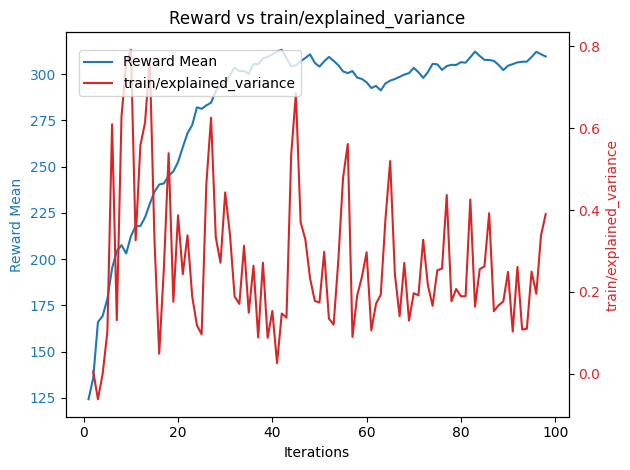

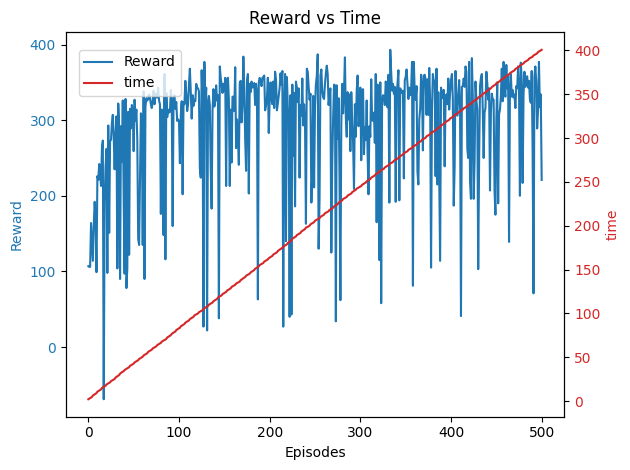

In [6]:
train_data_log: DataFrame = pd.read_csv(tmp_path+"progress.csv")
train_data_monitor: DataFrame = pd.read_csv(tmp_path+"monitor.csv", header=1)

# train_data_monitor = pd.concat([train_data_monitor] * 3, ignore_index=True)
print(train_data_log.columns.to_list())

fig, ax1 = plt.subplots()

iterations: Series[int] = train_data_log['time/iterations'].astype(int)


ax1.set_xlabel('Iterations')
color = 'tab:blue'
ax1.set_ylabel('Reward Mean', color=color)
ax1.plot(iterations,
         train_data_log['rollout/ep_rew_mean'], color=color, label='Reward Mean')
ax1.tick_params(axis='y', labelcolor=color)


col = 'train/explained_variance'

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel(col, color=color)
ax2.plot(iterations, train_data_log[col], color=color, label=col)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Reward vs ' + col)


fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()


fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = 'tab:blue'
ax1.set_ylabel('Reward', color=color)
ax1.plot(episodes, train_data_monitor['r'], color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Reward vs Time')


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('time', color=color)
ax2.plot(episodes, train_data_monitor['t'], color=color, label='time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()

## Comprobación funcionamiento


In [7]:
seed = None
env = make(env_id, seed=seed)
model = PPO.load(name, print_system_info=True)
print(type(env))
num_steps = 1
obs, _ = env.reset()
# Variables de información:
acciones = []
rewards = []
ocu = []
tams = []
num = []
lim_ocu = 0
a2 = []

# -------------------------

_states = None
ant = env._get_info()
for episode in range(num_steps):

    done = False
    step_counter = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, terminated, info = env.step(action)
        if len(ant) > 0 and ant != info:
            print(info["Stats"])
        ant = info

        ocu.append(info["Stats"]["OcupacionActual"])
        tams.append(info["Stats"]["TamañoTotal"])
        num.append(info["Stats"]["NumPaquetes"])
        a2.append(info["Stats"]["Action"])

        rewards.append(reward)
        acciones.append(action.item())

        done: bool = done or terminated

    env.reset(seed=seed)
    step_counter += 1

# Debug
print(f"Acciones: {acciones}")
print(list(map(lambda x: Acciones.int_to_action(x), acciones)))
print(list(map(lambda x: int(round(x, 0)), rewards)))
print(a2)
print(acciones.count(acciones[-1])/len(acciones))

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

<class 'custom_env.router_env.RouterEnv'>
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 0, 'TamañoTotal': 0.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.0}
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 4, 'TamañoTotal': 337.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.016}
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 8, 'TamañoTotal': 716.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.032}
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 11, 'TamañoTotal': 985.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.04

In [8]:
assert len(acciones) != a2.count(
    Acciones.DENEGAR), "Se han denegado todos los paquetes"
assert len(acciones) != a2.count(
    Acciones.PERMITIR), "Se han permitido todos los paquetes"

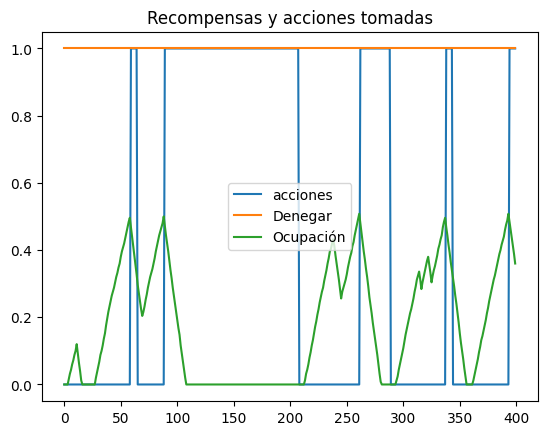

Rewards:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
assert len(acciones) == len(rewards)
# plt.plot(rewards, label="rewards")
plt.plot(acciones, label="acciones")

plt.plot([Acciones.action_to_int(Acciones.DENEGAR)]
         * len(acciones), label="Denegar")
plt.plot(ocu, label="Ocupación")
plt.title("Recompensas y acciones tomadas")

plt.legend()
plt.show()
print("Rewards: ", rewards)
num_permitidos = acciones.count(Acciones.action_to_int(Acciones.PERMITIR))
print(num_permitidos, len(acciones)-num_permitidos, "",
      num_permitidos/len(acciones), 1-num_permitidos/len(acciones))

Ocupación:  [0.0, 0.0, 0.0, 0.0, 0.016, 0.032, 0.044, 0.06, 0.072, 0.088, 0.1, 0.12, 0.092, 0.064, 0.04, 0.012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.036, 0.052, 0.068, 0.088, 0.1, 0.116, 0.136, 0.152, 0.176, 0.196, 0.216, 0.232, 0.248, 0.264, 0.276, 0.288, 0.304, 0.32, 0.332, 0.348, 0.36, 0.38, 0.396, 0.408, 0.42, 0.436, 0.452, 0.468, 0.484, 0.496, 0.468, 0.44, 0.412, 0.384, 0.356, 0.328, 0.296, 0.272, 0.248, 0.224, 0.204, 0.216, 0.232, 0.252, 0.268, 0.288, 0.304, 0.32, 0.332, 0.344, 0.36, 0.376, 0.396, 0.412, 0.428, 0.444, 0.456, 0.468, 0.48, 0.5, 0.472, 0.444, 0.42, 0.396, 0.368, 0.34, 0.316, 0.288, 0.264, 0.24, 0.216, 0.192, 0.168, 0.148, 0.116, 0.092, 0.068, 0.044, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

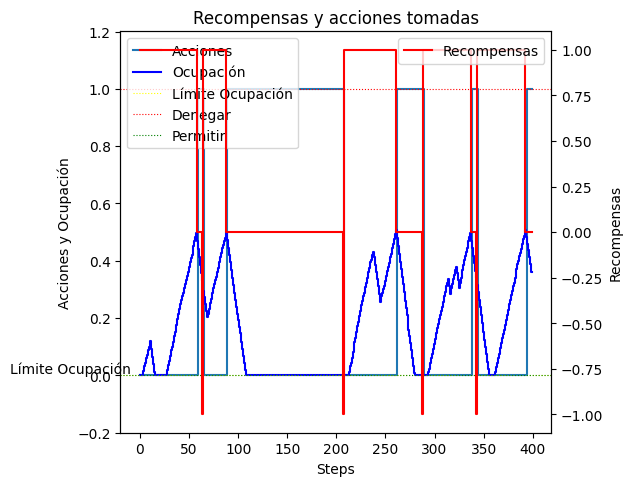

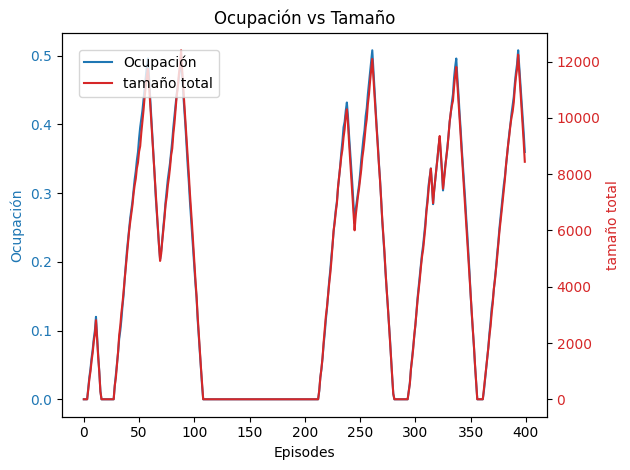

La ocupación máxima es de 51%
La ocupación mínima es de 0%


In [10]:
print("Ocupación: ", ocu)
fig, ax1 = plt.subplots()

# Configurar el eje X e Y
ax1.set_xlabel('Steps')
ax1.set_ylabel('Acciones y Ocupación')

# Graficar las acciones y la ocupación
ax1.step(range(len(acciones)), acciones, label="Acciones", where='post')
# ax1.step(range(len(acciones)), [1] * len(acciones), label="Denegar", where='mid')  # Ajustar según tus datos
ax1.step(range(len(ocu)), ocu, label="Ocupación", where='mid', color='blue')

# Crear línea horizontal en el gráfico
ax1.axhline(y=lim_ocu, color='yellow', linestyle='dotted',
            linewidth=0.8, label='Límite Ocupación')

# Agregar marca en el eje Y
ticks = list(ax1.get_yticks())  # Obtener los ticks actuales
if lim_ocu not in ticks:
    ticks.append(lim_ocu)  # Agregar el límite de ocupación a los ticks
ax1.set_yticks(sorted(ticks))  # Actualizar los ticks

# Anotar el límite en el eje
ax1.annotate(
    'Límite Ocupación',
    xy=(-0.1, lim_ocu),  # Coordenada en el eje Y
    xytext=(-50, lim_ocu + 5),
    textcoords='offset points',
    fontsize=10, color='black',
    ha='center',
    va='center'
)
ax1.axhline(y=Acciones.action_to_int(Acciones.DENEGAR), color='red',
            linestyle='dotted', linewidth=0.8, label='Denegar')
ax1.axhline(y=Acciones.action_to_int(Acciones.PERMITIR),
            color='green', linestyle='dotted', linewidth=0.8, label='Permitir')


# Leyenda del primer eje
ax1.legend(loc='upper left')

# Crear segundo eje Y para las recompensas
ax2 = ax1.twinx()
ax2.set_ylabel('Recompensas')
ax2.step(range(len(rewards)), rewards,
         label="Recompensas", where='mid', color='r')

# Leyenda del segundo eje
ax2.legend(loc='upper right')

# Ajustar diseño y mostrar título
fig.tight_layout()
plt.title("Recompensas y acciones tomadas")
plt.show()


tam = [x/1 for x in tams]


"""
plt.step(range(len(acciones)), acciones, label="acciones", where='mid')
plt.step(range(len(acciones)), [Acciones.action_to_int(Acciones.DENEGAR)]*len(acciones), label="Denegar", where='mid')
plt.plot([lim_ocu]*len(ocu), label="LimiteOcupación")
"""

fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = 'tab:blue'
label = 'Ocupación'
ax1.set_ylabel(label, color=color)
ax1.plot(range(len(ocu)), ocu, color=color, label=label)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Ocupación vs Tamaño')


ax2 = ax1.twinx()
color = 'tab:red'
label = 'tamaño total'
ax2.set_ylabel(label, color=color)
ax2.plot(range(len(tams)), tam, color=color, label=label)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()

"""plt.step(range(len(ocu)),ocu, label="Ocupación",where='mid')
plt.step(range(len(tams)),tam, label="Tamaño",where='mid')


plt.title("Recompensas y acciones tomadas")
plt.legend()
plt.show()"""
print(f"La ocupación máxima es de {np.max(ocu):.0%}")
print(f"La ocupación mínima es de {np.min(ocu):.0%}")

## Pruebas:


In [11]:
print(f"Tiempo medio: {tiempo_global/iteraciones if abs(iteraciones) > 1e-5 else 0:.2f} micro-segundos de {iteraciones} iteraciones")

Tiempo medio: 0.00 micro-segundos de 0 iteraciones


In [12]:
print(Acciones.action_to_int(Acciones.PERMITIR))
print(Acciones.action_to_int(Acciones.DENEGAR))

0
1


['EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'Estado

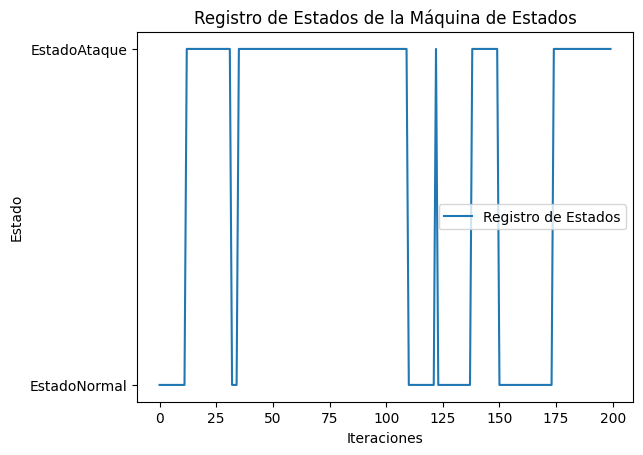

In [13]:
from custom_env.states import *
maquina = MaquinaDeEstados()
for _ in range(200):
    maquina.cambiar_estado()
print(maquina.registro_estados)

plt.plot(maquina.registro_estados, label="Registro de Estados")
plt.xlabel("Iteraciones")
plt.ylabel("Estado")
plt.title("Registro de Estados de la Máquina de Estados")
plt.legend()
plt.show()

In [14]:
# Lista de ejemplo
lista: list[str] = [x.__name__ for x in maquina.estados_posibles]
combinaciones_con_repeticion = list(product(lista, repeat=2))
dict_con: dict[tuple[str, str], int] = {
    x: 0 for x in combinaciones_con_repeticion}

print(dict_con)
duracion_ataques = []
estado_Ant = maquina.registro_estados[0]

for estado in maquina.registro_estados[1:]:
    dict_con[(estado_Ant, estado)] += 1

    if (estado_Ant, estado) == (EstadoNormal.__name__, EstadoAtaque.__name__):  # Empieza ataque
        duracion_ataques.append(1)
    elif (estado_Ant, estado) == (EstadoAtaque.__name__, EstadoAtaque.__name__):  # Sigue ataque
        if len(duracion_ataques) > 0:
            duracion_ataques[-1] += 1

    estado_Ant: Estado = estado

print(
    f"Como promedio los {len(duracion_ataques)} ataques duran {np.mean(duracion_ataques):.1f} iteraciones.")
print("Duracion 5 primeros ataques: ", duracion_ataques[:5], "...")
try:
    for estado1 in lista:
        total = 0
        for estado2 in lista:
            total += dict_con[(estado1, estado2)]
        print(f"Estando en {estado1}:")
        for estado2 in lista:
            print(f"De {estado1} a {estado2}: {
                dict_con[(estado1, estado2)] / total:6.2%}")
except:
    pass

{('EstadoNormal', 'EstadoNormal'): 0, ('EstadoNormal', 'EstadoAtaque'): 0, ('EstadoAtaque', 'EstadoNormal'): 0, ('EstadoAtaque', 'EstadoAtaque'): 0}
Como promedio los 5 ataques duran 26.8 iteraciones.
Duracion 5 primeros ataques:  [20, 75, 1, 12, 26] ...
Estando en EstadoNormal:
De EstadoNormal a EstadoNormal: 92.42%
De EstadoNormal a EstadoAtaque:  7.58%
Estando en EstadoAtaque:
De EstadoAtaque a EstadoNormal:  3.01%
De EstadoAtaque a EstadoAtaque: 96.99%


In [15]:
_np_random, _ = seeding.np_random(None)
pak = []
for _ in range(1000):
    pak.append(_np_random.integers(1, 10, endpoint=True))

print(f"{np.min(pak)},{np.max(pak)},{np.mean(pak):.0f},{np.std(pak):.0f}")
pak = []
for _ in range(1000):
    pak.append(_np_random.integers(1, 10, endpoint=False))

print(f"{np.min(pak)},{np.max(pak)},{np.mean(pak):.0f},{np.std(pak):.0f}")
print(type(0.0), type(0))
print(int(0.2))

1,10,6,3
1,9,5,3
<class 'float'> <class 'int'>
0
